In [1]:
#Import Library
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Membaca csv
df = pd.read_csv("online_retail2.csv", engine='python', on_bad_lines='skip')

In [3]:
#Menampilkan data csv
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2024-12-01 08:26:00,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,2024-12-01 08:26:00,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2024-12-01 08:26:00,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2024-12-01 08:26:00,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2024-12-01 08:26:00,3.39,17850.0
...,...,...,...,...,...,...,...
156192,550124,84988,SET OF 72 PINK HEART PAPER DOILIES,12,2024-04-14 12:41:00,1.45,12853.0
156193,550124,21212,PACK OF 72 RETROSPOT CAKE CASES,24,2024-04-14 12:41:00,0.55,12853.0
156194,550124,22178,VICTORIAN GLASS HANGING T-LIGHT,12,2024-04-14 12:41:00,1.25,12853.0
156195,550124,22457,NATURAL SLATE HEART CHALKBOARD,6,2024-04-14 12:41:00,2.95,12853.0


In [4]:
#Mengubah InvoiceDate menjadi DateTime Series
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

In [5]:
#Menghitung NaT column
nat_count = df['InvoiceDate'].isna().sum()
total_rows = len(df)
percentage = (nat_count / total_rows) * 100

print(f"Jumlah baris yang NaT: {nat_count}")
print(f"Persentase data yang hilang: {percentage:.2f}%")

Jumlah baris yang NaT: 0
Persentase data yang hilang: 0.00%


In [6]:
#Menghapus InvoiceDate yang NaT
df.dropna(subset=['InvoiceDate'], inplace=True)

print(f"Jumlah baris setelah penghapusan: {len(df)}")

Jumlah baris setelah penghapusan: 156197


In [7]:
nat = df[df['InvoiceDate'].isna()]

print("Detail InvoiceDate NaT:")
print(nat)

Detail InvoiceDate NaT:
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID]
Index: []


In [8]:
#Drop Customer ID yang null
df = df.dropna(subset=['CustomerID'])

In [9]:
#Membuat Kolom Total Price
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

/tmp/ipython-input-2521657059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


In [10]:
#Menentukan tanggal referensi yakni tanggal paling akhir di dataset
reference_date = df['InvoiceDate'].max()

In [11]:
#Membuat RFM
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()

In [12]:
#Membuat kolom RFM
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [13]:
print("\nStatistik RFM:\n")
print(rfm[['Recency', 'Frequency', 'Monetary']].describe())


Statistik RFM:

           Recency    Frequency      Monetary
count  2361.000000  2361.000000   2361.000000
mean    179.114358     2.747141    959.722863
std     139.084749     3.895023   2945.557350
min       0.000000     1.000000  -1192.200000
25%      14.000000     1.000000    205.980000
50%     261.000000     2.000000    388.300000
75%     294.000000     3.000000    876.040000
max     354.000000    62.000000  81567.620000


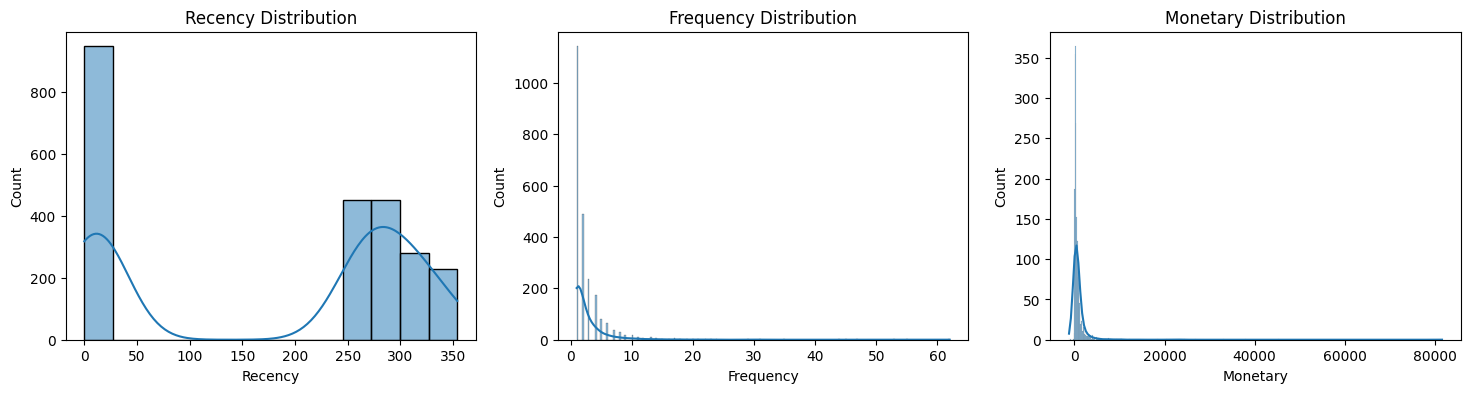

In [14]:
#Visualisasi RFM
plt.figure(figsize=(18,4))

plt.subplot(1,3,1)
sns.histplot(rfm['Recency'], kde=True)
plt.title("Recency Distribution")

plt.subplot(1,3,2)
sns.histplot(rfm['Frequency'], kde=True)
plt.title("Frequency Distribution")

plt.subplot(1,3,3)
sns.histplot(rfm['Monetary'], kde=True)
plt.title("Monetary Distribution")

plt.show()

In [15]:
# Melakukan scaling data
scaler = MinMaxScaler()

rfm_scaled = rfm.copy()
rfm_scaled[['Recency', 'Frequency', 'Monetary']] = scaler.fit_transform(
    rfm[['Recency', 'Frequency', 'Monetary']]
)

print("\nRFM Setelah MinMax Scaling:\n")
print(rfm_scaled.head())


RFM Setelah MinMax Scaling:

   CustomerID   Recency  Frequency  Monetary
0     12346.0  0.960452   0.016393  0.014406
1     12347.0  0.045198   0.032787  0.036438
2     12348.0  0.016949   0.032787  0.032376
3     12350.0  0.918079   0.000000  0.018446
4     12352.0  0.776836   0.114754  0.021670


In [16]:
#Membuat hasil RFM dalam format csv
rfm_scaled.to_csv("RFM_online_retail.csv", index=False)

In [17]:
!git clone https://github.com/FairuzMaulidya/Capstone_Dicoding.git

Cloning into 'Capstone_Dicoding'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 7 (delta 0), reused 3 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (7/7), 216.21 KiB | 3.54 MiB/s, done.


In [18]:
%cd Capstone_Dicoding

/content/Capstone_Dicoding


In [19]:
!git branch

* main


In [20]:
!git checkout -b fairuz

Switched to a new branch 'fairuz'


In [21]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
!ls "/content/drive/MyDrive/Capstone"

Analisis_RFM.ipynb  EDA.ipynb  Kmean-Interpretasi.ipynb
